## Implementation of Moran's I on a regular grid

Chris Prince [cmp670@nyu.edu]

18 Oct 2018

In [1]:
import numpy as np
from matplotlib import pylab as pl
%matplotlib inline

Define a matrix of values, associated with rectangles on a grid (uncomment any one example):

In [2]:
#somethingInteresting = np.array([[1,1,1],[1,1,0],[1,0,0]])
#somethingInteresting = np.array([[2,3,3],[1,2,3],[1,1,2]])
#somethingInteresting = np.array([[7,2,4],[8,6,3],[1,1,2]])
#somethingInteresting = np.array([[0,3,0],[3,0,3],[0,3,0]])

#Here's a upper triangular matrix of ones and lower of zeros (I~+1)
somethingInteresting = np.triu(np.ones(35))

#Here's a 25x25 checkerboard pattern that should have I=-1:
#somethingInteresting = np.array([1 if i%2 else 0 for i in range(25**2)]).reshape(25,25)

In [3]:
somethingInteresting

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Get the dimensions and the total number of entries:

In [4]:
xdim, ydim = somethingInteresting.shape
N = xdim*ydim

The weight matrix for rook contiguity can be calculated for a grid by iterating over the matrix elements and checking if the flattened dimensions differ by either one or the width of the matrix:

In [5]:
W = np.array([1 if abs(i-j)==xdim else
              1 if (abs(i-j)==1 and (i+j)%xdim !=(xdim-1)) else  # modulus needed to not count across rows!
              0 
              for i in range(N) 
              for j in range(N)]).reshape(N, N)
W

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

Calculate row sums and normalize the weight matrix:

In [6]:
rowSums = W.sum(axis=0)
rowSums

array([2, 3, 3, ..., 3, 3, 2])

In [7]:
Wr = np.zeros_like(W, dtype=np.float)
for i in range(N):
    for j in range(N):
        Wr[i,j] = W[i,j]/rowSums[i]
Wr        

array([[0.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

Moran's I $I$ is given by:
$$I = \frac{N \sum_{i=1}^{N}\sum_{j=1}^{N} w_{ij}(x_i - \bar{x})(x_j - \bar{x})}{(\sum_{i=1}^{N}\sum_{j=1}^{N} w_{ij})(\sum_{i=1}^{N}(x_i - \bar{x})^2))}$$

So let's get $\bar{x}$:

In [8]:
xbar = somethingInteresting.mean()

We need to flatten the data to make it compatible with our weight indices:

In [9]:
x = somethingInteresting.flatten()

Now we simply implement the equation above:

In [10]:
N*sum(Wr[i,j]*(x[i]-xbar)*(x[j]-xbar) 
      for i in range(N) for j in range(N)) / (
    sum(Wr[i,j] 
        for i in range(N) for j in range(N)) * 
    sum((x[i]-xbar)**2 
        for i in range(N)))

0.9430905695611606

Note that since we have row-normalized weights, the term $\sum_{i=1}^{N}\sum_{j=1}^{N}w_{ij}$ in the denominator reduces to $N$ and cancels the $N$ in the numerator, so we can simply calculate:

In [11]:
sum(Wr[i,j]*(x[i]-xbar)*(x[j]-xbar) 
      for i in range(N) for j in range(N)) / (
    sum((x[i]-xbar)**2 
        for i in range(N)))

0.9430905695611553

We can see this is the slope of the best fit line through the graph of lag versus data:

In [12]:
lag = np.matmul(Wr,x)
m, b = np.polyfit(x, lag, 1)
m, b

(0.94309056956116, 0.029131652661064576)

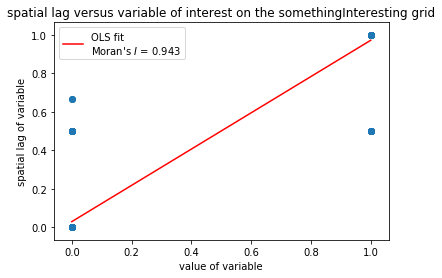

In [13]:
pl.scatter(x, lag)
pl.plot(np.linspace(min(x), max(x),10), 
     [m*xx+b for xx in np.linspace(min(x),max(x), 10)], 
     c='r', label="OLS fit\nMoran's $I$ = {:.3f}".format(m))
pl.title("spatial lag versus variable of interest on the somethingInteresting grid")
pl.xlabel("value of variable")
pl.ylabel("spatial lag of variable")
pl.legend()